In [1]:
import pandas as pd

In [34]:
import pandas as pd

# Import the first table from the Wikipedia page
test_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes')[1]

# Display the first few rows of the table
test_df.head()

,No. overall,No. in season,Title,Directed by,Written by,Original air date [20],U.S. viewers (millions)
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22[21]
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20[22]
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44[23]
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45[24]
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58[25]


In [35]:
# List to hold all the season tables
appended_data = []

# Loop to read each season table and append to the list
for i in range(1, 9):
    season_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes')[i]
    appended_data.append(season_df)

# Concatenate all the season tables into a single DataFrame
df = pd.concat(appended_data, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
df.head()

,No. overall,No. in season,Title,Directed by,Written by,Original air date [20],U.S. viewers (millions)
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22[21]
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20[22]
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44[23]
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45[24]
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58[25]


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   No. overall              73 non-null     int64 
 1   No. in season            73 non-null     int64 
 2   Title                    73 non-null     object
 3   Directed by              73 non-null     object
 4   Written by               73 non-null     object
 5   Original air date [20]   73 non-null     object
 6   U.S. viewers (millions)  73 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.1+ KB


In [37]:
# Extract the first four characters (they represent the numeric value) and convert to float
df['U.S. viewers (millions)'] = [x[:4] for x in df['U.S. viewers (millions)']]
df['U.S. viewers (millions)'] = pd.to_numeric(df['U.S. viewers (millions)'])


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   No. overall              73 non-null     int64  
 1   No. in season            73 non-null     int64  
 2   Title                    73 non-null     object 
 3   Directed by              73 non-null     object 
 4   Written by               73 non-null     object 
 5   Original air date [20]   73 non-null     object 
 6   U.S. viewers (millions)  73 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.1+ KB


In [39]:
df

,No. overall,No. in season,Title,Directed by,Written by,Original air date [20],U.S. viewers (millions)
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58
...,...,...,...,...,...,...,...
68,69,2,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,"April 21, 2019",10.20
69,70,3,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.00
70,71,4,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80
71,72,5,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",12.40


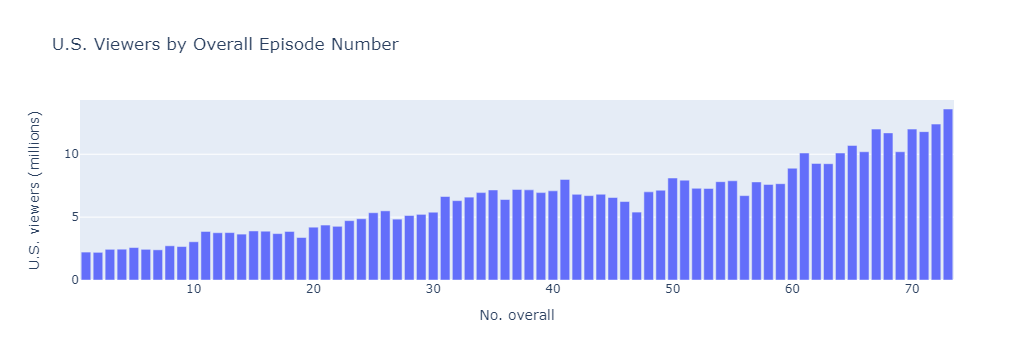

In [40]:
import plotly.express as px

# Create a bar chart
fig = px.bar(df, x='No. overall', y='U.S. viewers (millions)', title='U.S. Viewers by Overall Episode Number')
fig.show()

In [19]:
df.groupby('No. in season', as_index= False)['U.S. viewers (millions)'].mean()

,No. in season,U.S. viewers (millions)
0,1,6.853750
1,2,6.263750
2,3,6.595000
3,4,6.807500
4,5,7.067500
5,6,6.871250
6,7,6.190000
7,8,5.581667
8,9,5.501667
9,10,6.120000


In [41]:
import numpy as np
num_episodes_per_season = 10

# Calculate the total number of seasons required
num_seasons = (len(df) + num_episodes_per_season - 1) // num_episodes_per_season

# Generate the 'season' column
df['season'] = np.repeat(range(1, num_seasons + 1), num_episodes_per_season)[:len(df)]
df

,No. overall,No. in season,Title,Directed by,Written by,Original air date [20],U.S. viewers (millions),season
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,1
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20,1
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44,1
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45,1
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58,1
...,...,...,...,...,...,...,...,...
68,69,2,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,"April 21, 2019",10.20,7
69,70,3,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.00,7
70,71,4,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80,8
71,72,5,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",12.40,8


In [42]:
numOfViewsPerSeason = df.groupby('season', as_index= False)['U.S. viewers (millions)'].mean()
numOfViewsPerSeason

,season,U.S. viewers (millions)
0,1,2.515
1,2,3.795
2,3,4.966
3,4,6.846
4,5,6.880
5,6,7.688
6,7,10.552
7,8,12.600


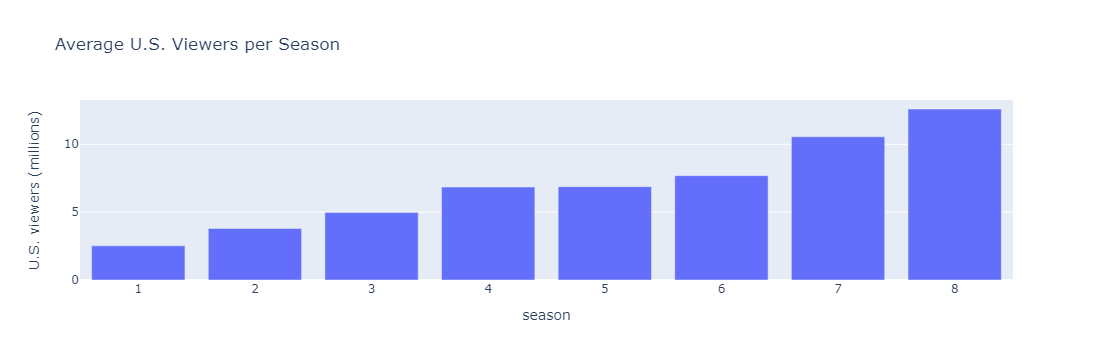

In [43]:
# Create a bar chart for average U.S. viewers per season
fig = px.bar(numOfViewsPerSeason, x='season', y='U.S. viewers (millions)', title='Average U.S. Viewers per Season')
fig.show()

In [45]:
df.to_csv('GOT_DataFrame.csv', index= False)
numOfViewsPerSeason.to_csv('numOfViewsPerSeason.csv', index= False)